# Quora_Preprocessing_features_extraction

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Loading dataset
df=pd.read_csv('https://github.com/Koorimikiran369/Quora-Question-Pairing/raw/main/train.csv.zip')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# lets explore the data

In [ ]:
display(df.shape)
print("Shape of the data \n")
display(df.columns)
print("columns of the data \n ")
display(df.info())
print("Information of the data \n ")
display(df.dtypes)
print(" Data type \n ")

(404290, 6)

Shape of the data 



Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

columns of the data 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


None

Information of the data 
 


id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

 Data type 
 


# lets remove null values if there

In [ ]:
df.isna().sum()


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# lets check is there any duplicate rows are there or not
df.duplicated().sum()

0

# lets check the ratio of the depentent features

In [ ]:
dm=pd.DataFrame(df['is_duplicate'].value_counts()).reset_index()
dm.columns=["Class", "Count"]
dm['Percentage']=(dm['Count']/df.shape[0])*100
dm


,Class,Count,Percentage
0,0,255024,63.079941
1,1,149263,36.920059


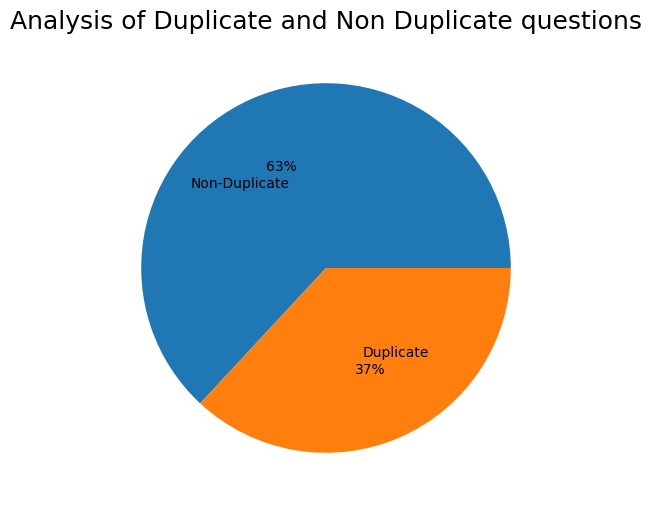

In [ ]:
label=['Non-Duplicate', 'Duplicate']
plt.figure(figsize=(6,6))
plt.pie(x=dm['Count'], labels=label, autopct='%.0f%%' , labeldistance=0.5)
plt.title("Analysis of Duplicate and Non Duplicate questions", fontsize=18, color='black');


# lets balance the given data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# X: Feature matrix, y: Target variable
X = df.iloc[:,:-1]  # Your feature data
y = df.iloc[:,-1:] # Your target labels

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the class distribution after undersampling
unique, counts = np.unique(y_resampled, return_counts=True)
print("Class distribution after undersampling:")
for label, count in zip(unique, counts):
    print("Class {}: {}".format(label, count))
df = pd.concat([X_resampled, y_resampled], axis=1)

Class distribution after undersampling:
Class 0: 149263
Class 1: 149263


In [ ]:
display(df.shape)
print("Shape of the data \n")
display(df.columns)
print("columns of the data \n ")
display(df.info())
print("Information of the data \n ")
display(df.dtypes)
print(" Data type \n ")

(298526, 6)

Shape of the data 



Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

columns of the data 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298526 entries, 0 to 298525
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            298526 non-null  int64 
 1   qid1          298526 non-null  int64 
 2   qid2          298526 non-null  int64 
 3   question1     298526 non-null  object
 4   question2     298526 non-null  object
 5   is_duplicate  298526 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.7+ MB


None

Information of the data 
 


id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

 Data type 
 


- Now we have both questions 50-50
- Data we had before balancing = 404290
- Data we have after balancing = 298526
- Difference = 105764 (23%)

# Lets do some text preprocessing

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import contractions
import re

In [ ]:
from tqdm import tqdm, tqdm_notebook
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [ ]:
def preprocess(text):
    text=str(text).lower()
    text=text.replace('%', ' percent')
    text=text.replace('$', ' dollar ')
    text=text.replace('₹', ' rupee ')
    text=text.replace('€', ' euro ')
    text=text.replace('@', ' at ')

    text=text.replace(',000,000,000 ', 'b ')
    text=text.replace(',000,000 ', 'm ')
    text=text.replace(',000 ', 'k ')
    text=re.sub(r'([0-9]+)000000000', r'\1b', text)
    text=re.sub(r'([0-9]+)000000', r'\1m', text)
    text=re.sub(r'([0-9]+)000', r'\1k', text)
    pattern=re.compile('\W')
    text=re.sub(pattern, ' ', text).strip()
    text=re.sub("<.*?>", "", text)
    text=contractions.fix(text)
    text=re.sub(" +", " ", text)
    return text



In [ ]:
df_bal=df[['question1','question2','is_duplicate']]

In [ ]:
df_bal['question1']=df_bal['question1'].progress_apply(preprocess)
df_bal['question2']=df_bal['question2'].progress_apply(preprocess)
pd.options.display.max_colwidth=10000000000000
df_bal.head()

100%|██████████| 298526/298526 [00:29<00:00, 10260.98it/s]


,question1,question2,is_duplicate
0,what are some examples of artificial satellites,what are artificial satellites,0
1,what does the term government mean,what does the term government 2 0 mean,0
2,is the usda constitutional,what is a usda loan,0
3,reservoir dogs 1992 movie if they had lived would mr orange and mr white have gotten together,is the movie reservoir dogs racist,0
4,what happens to an ant colony when a queen ant dies,why do ants carry away their dead,0


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def adv_preprocess(raw_text, flag):

    sentence = raw_text


    # Remove stop words
    clean_tokens = [t for t in sentence.split() if t not in stopwords.words("english")]

    # Stemming/Lemmatization and POS tagging
    if flag == 'stem':
        stemmer = PorterStemmer()
        token_list = []
        for word, tag in pos_tag(clean_tokens):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
            stem = stemmer.stem(word, wntag) if wntag else word
            token_list.append(stem)
    else:
        lemmatizer = WordNetLemmatizer()
        token_list = []
        for word, tag in pos_tag(clean_tokens):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
            lemma = lemmatizer.lemmatize(word, wntag) if wntag else word
            token_list.append(lemma)

    return pd.Series([" ".join(token_list)])

In [ ]:
df_bal['cleanQ1_stem'] = df_bal['question1'].progress_apply(lambda x: adv_preprocess(x, 'stem'))
df_bal['cleanQ2_stem'] = df_bal['question2'].progress_apply(lambda x: adv_preprocess(x, 'stem'))

100%|██████████| 298526/298526 [12:12<00:00, 407.70it/s]


# Now lets start the feature extraction
### 1. Basic feature ectraction

In [ ]:
# 1. Question length
df_bal['que1_len']=df_bal['cleanQ1_stem'].str.len()
df_bal['que2_len']=df_bal['cleanQ2_stem'].str.len()

# 2. Number of words
df_bal['que1_num_words'] =df_bal['cleanQ1_stem'].progress_apply(lambda sent: len(sent.split()))
df_bal['que2_num_words'] =df_bal['cleanQ2_stem'].progress_apply(lambda sent: len(sent.split()))

# 3. Total words in both question
def total_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['cleanQ1_stem'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['cleanQ2_stem'].split()))
    return len(q1_w) + len(q2_w)

df_bal['total_words']=df_bal.progress_apply(total_words, axis=1)

# 4. Common words in both questions
def common_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['cleanQ1_stem'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['cleanQ2_stem'].split()))
    return len(q1_w)&len(q2_w)

df_bal['common_words']=df_bal.progress_apply(common_words, axis=1)

# 5. Word sharing
df_bal['shared_words'] = round(df_bal['common_words']/df_bal['total_words'], 2)

df_bal.head(2)

100%|██████████| 298526/298526 [00:04<00:00, 61884.35it/s]


,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words
0,what are some examples of artificial satellites,what are artificial satellites,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,2,0.40
1,what does the term government mean,what does the term government 2 0 mean,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,1,0.12


# lets do some analysis on basic features

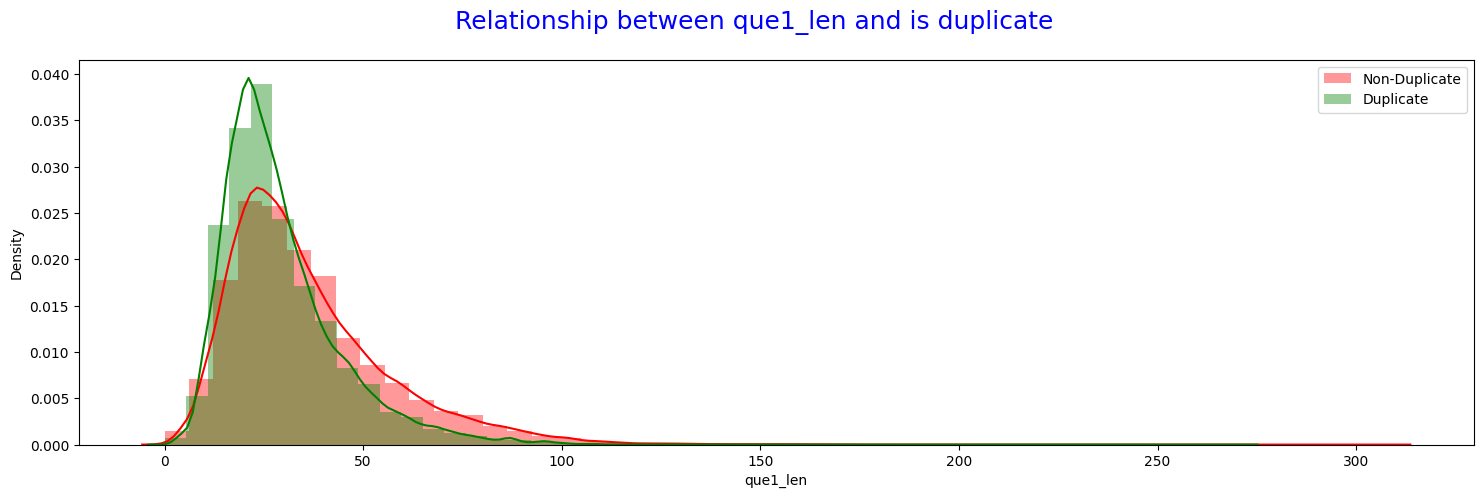

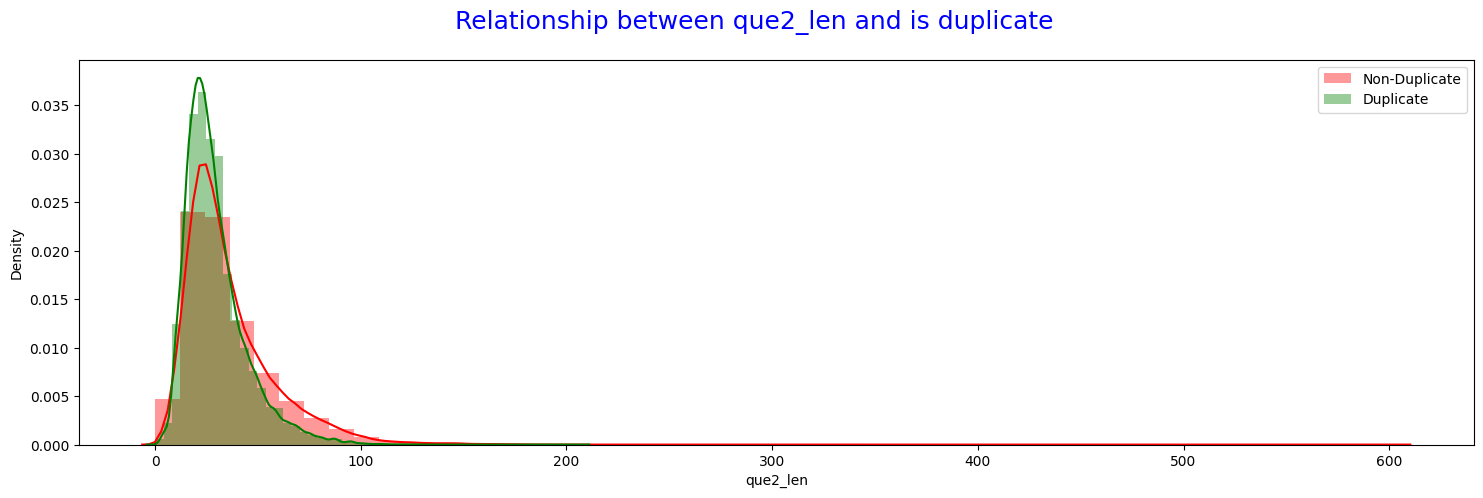

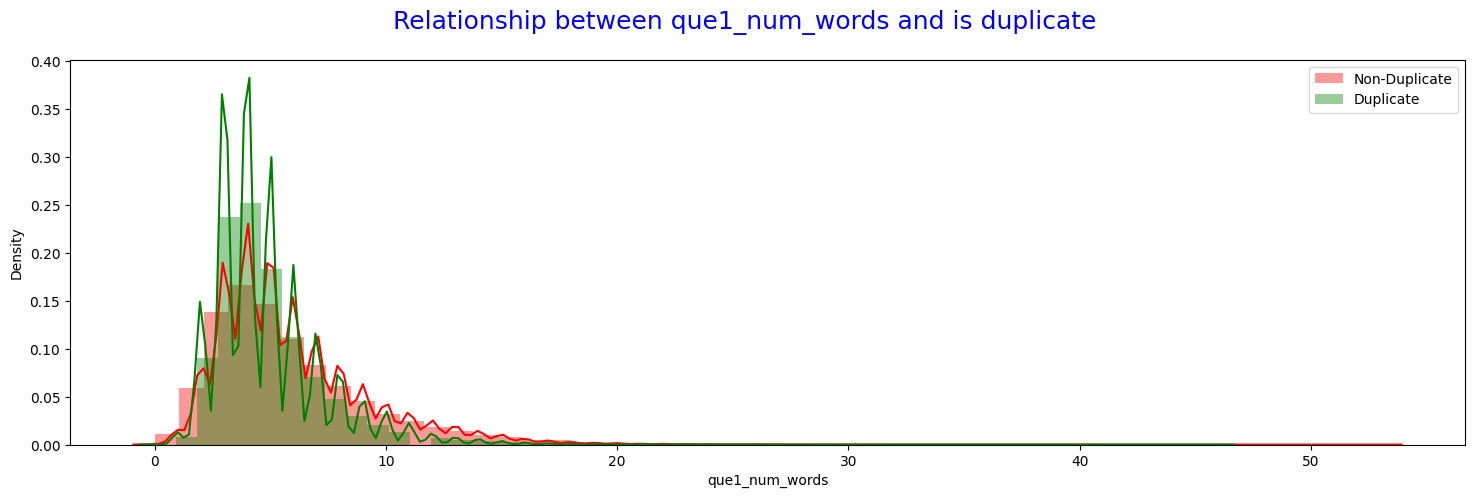

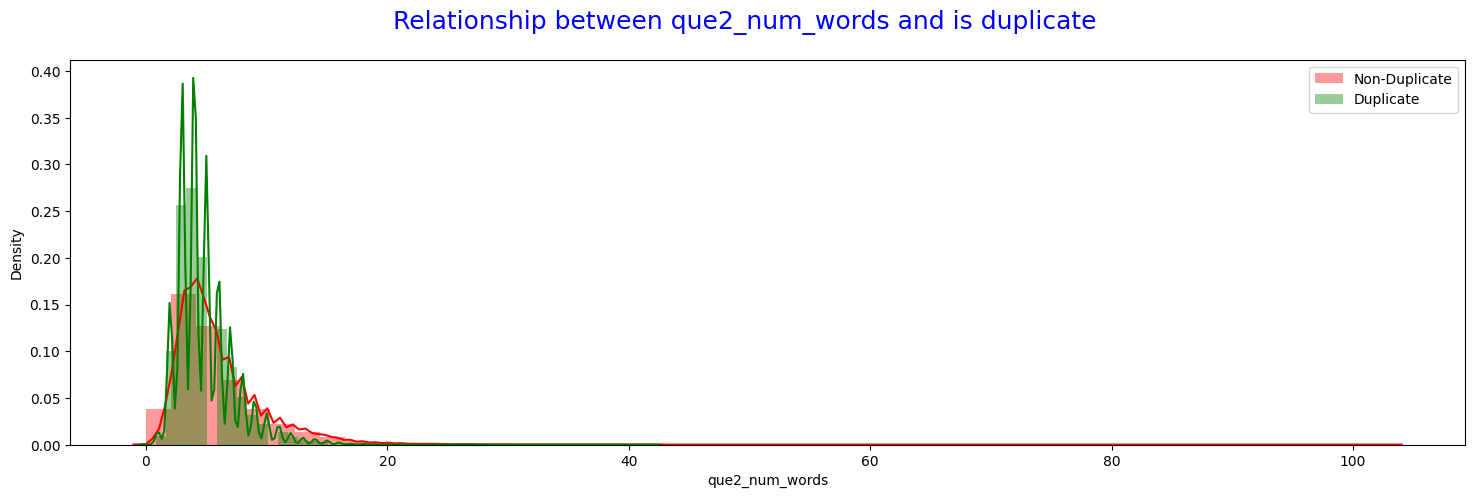

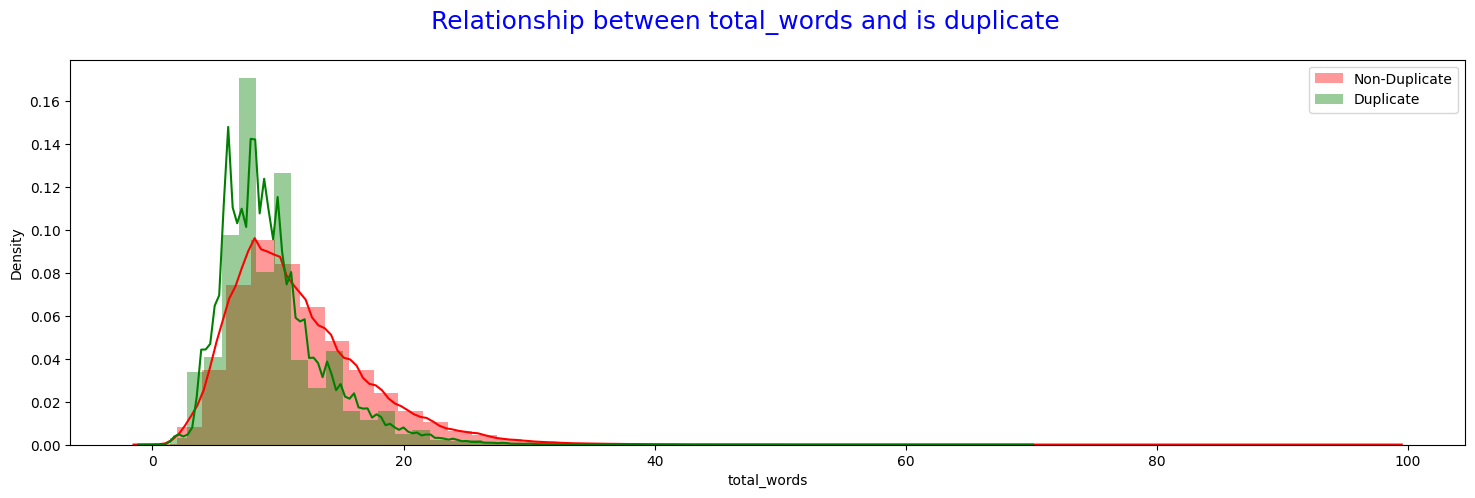

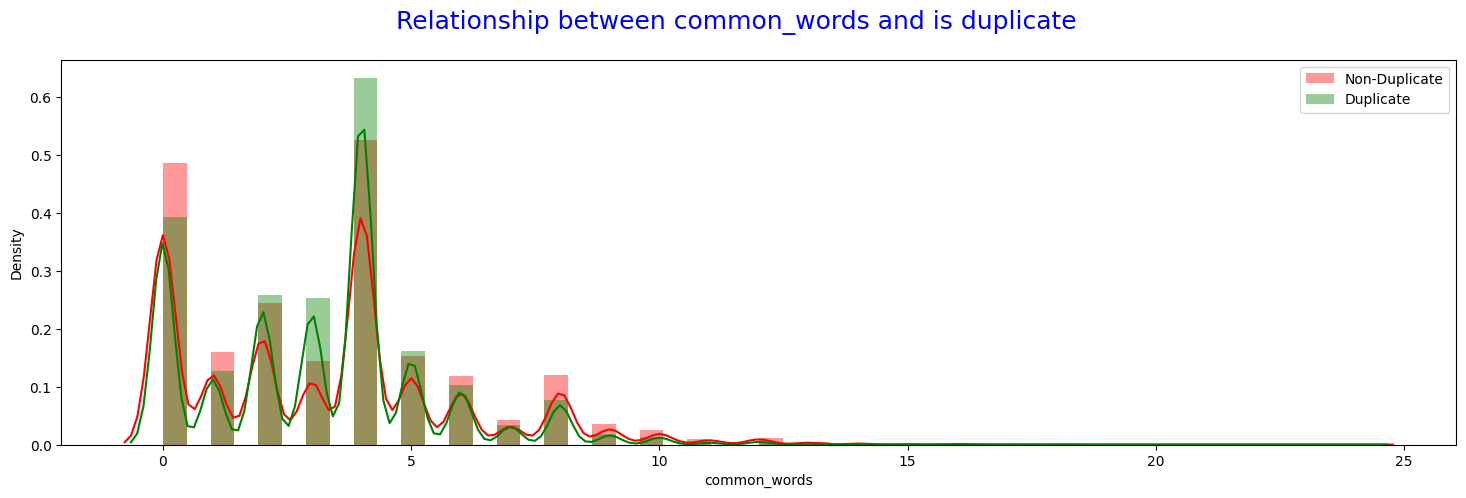

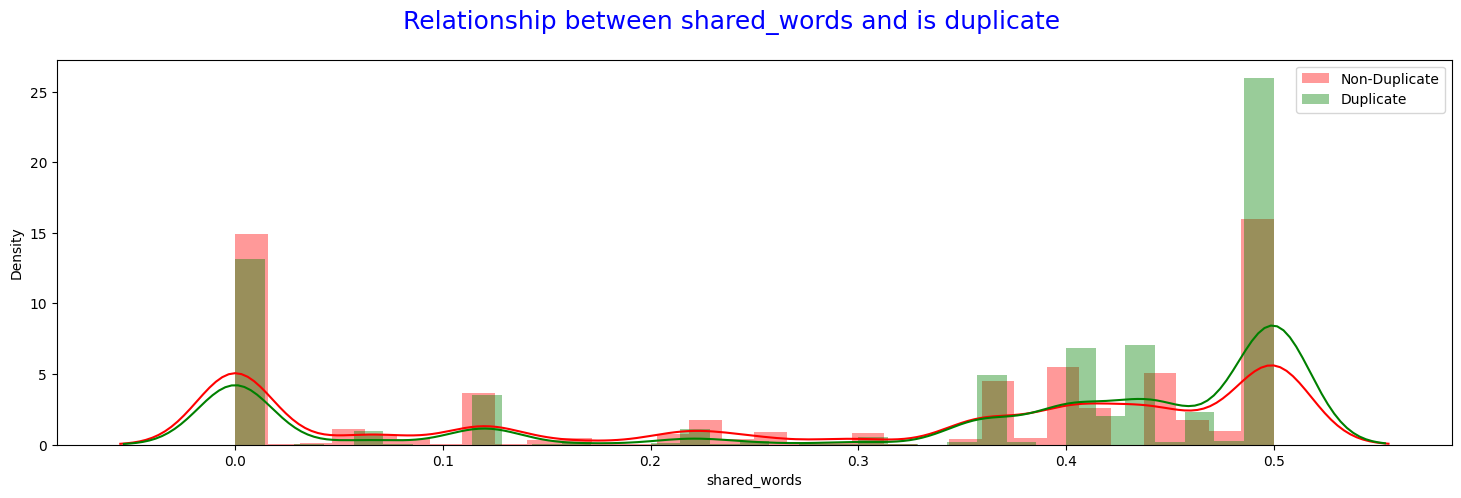

In [ ]:
basic_features_df=df_bal[['que1_len', 'que2_len', 'que1_num_words', 'que2_num_words', 'total_words',
       'common_words', 'shared_words']]
for col in basic_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(df_bal[df_bal['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(df_bal[df_bal['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);


### 2. Token based extraction

In [ ]:
def token_features_extraction(row):
    q1=row['question1']
    q2=row['question2']
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words("english")   #Stopwords
    token_features=[0.0]*8

    q1_tokens=q1.split()    #tokens in question1
    q2_tokens=q2.split()    #tokens in question2
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])     #non-stopwords in question1
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])     #non-stopwords in question2

    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])         #stopwords in question1
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])         #stopwords in question2

    common_word_count = len(q1_words.intersection(q2_words))                   #non-stopword count
    common_stop_count = len(q1_stops.intersection(q2_stops))                   #common stopword count
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))        #common token count

    token_features[0]=common_word_count/(min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])   #last word same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])     #first word same or not

    return token_features


In [ ]:
token_features=df_bal.progress_apply(token_features_extraction, axis=1)

df_bal["cwc_min"]=list(map(lambda x: x[0], token_features))
df_bal["cwc_max"]=list(map(lambda x: x[1], token_features))
df_bal["csc_min"]=list(map(lambda x: x[2], token_features))
df_bal["csc_max"]=list(map(lambda x: x[3], token_features))
df_bal["ctc_min"]= list(map(lambda x: x[4], token_features))
df_bal["ctc_max"]=list(map(lambda x: x[5], token_features))
df_bal["last_word_eq"]=list(map(lambda x: x[6], token_features))
df_bal["first_word_eq"]=list(map(lambda x: x[7], token_features))

df_bal.head(2)


100%|██████████| 298526/298526 [01:26<00:00, 3468.14it/s]


,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,what are some examples of artificial satellites,what are artificial satellites,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,2,0.40,0.999950,0.666644,0.999950,0.499988,0.999975,0.571420,1.0,1.0
1,what does the term government mean,what does the term government 2 0 mean,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,1,0.12,0.999967,0.599988,0.999967,0.999967,0.999983,0.749991,1.0,1.0


# lets do some analysis on token features

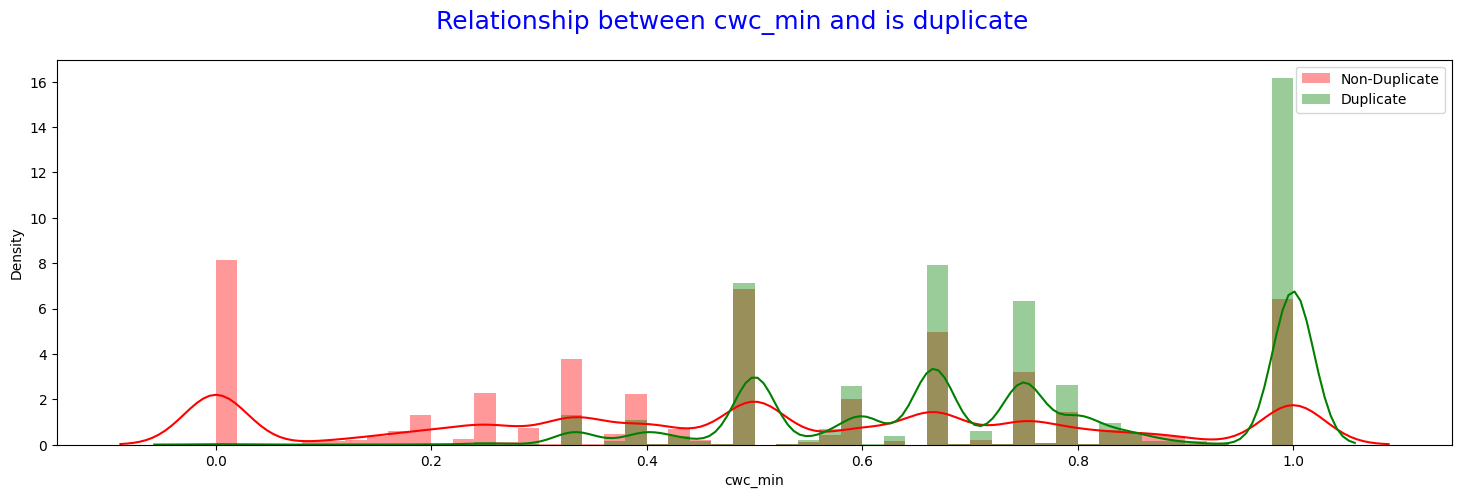

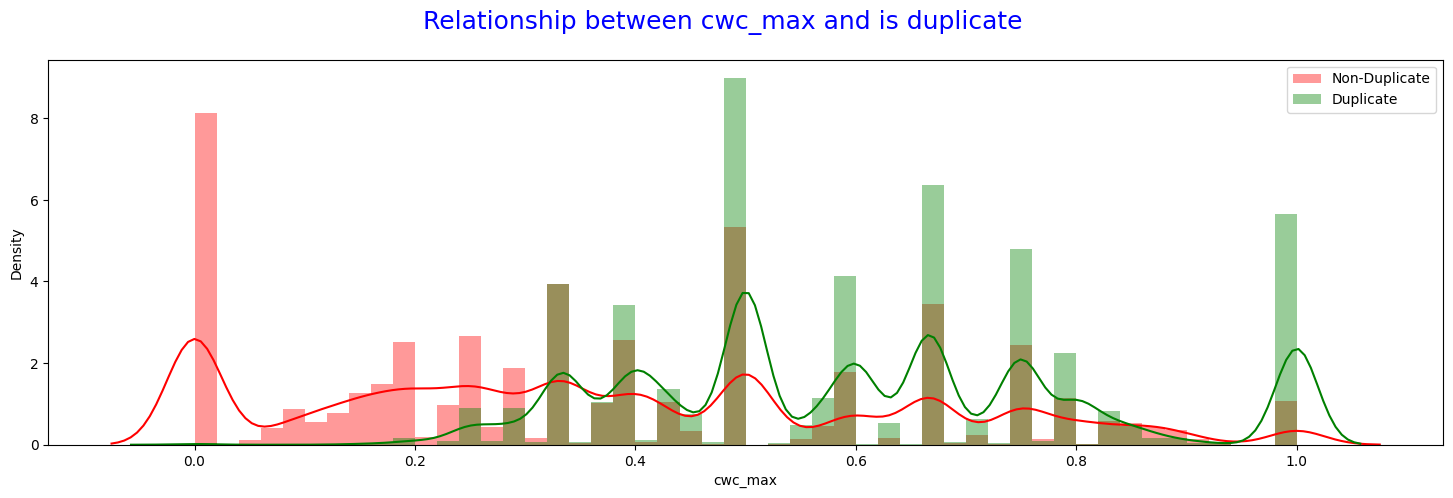

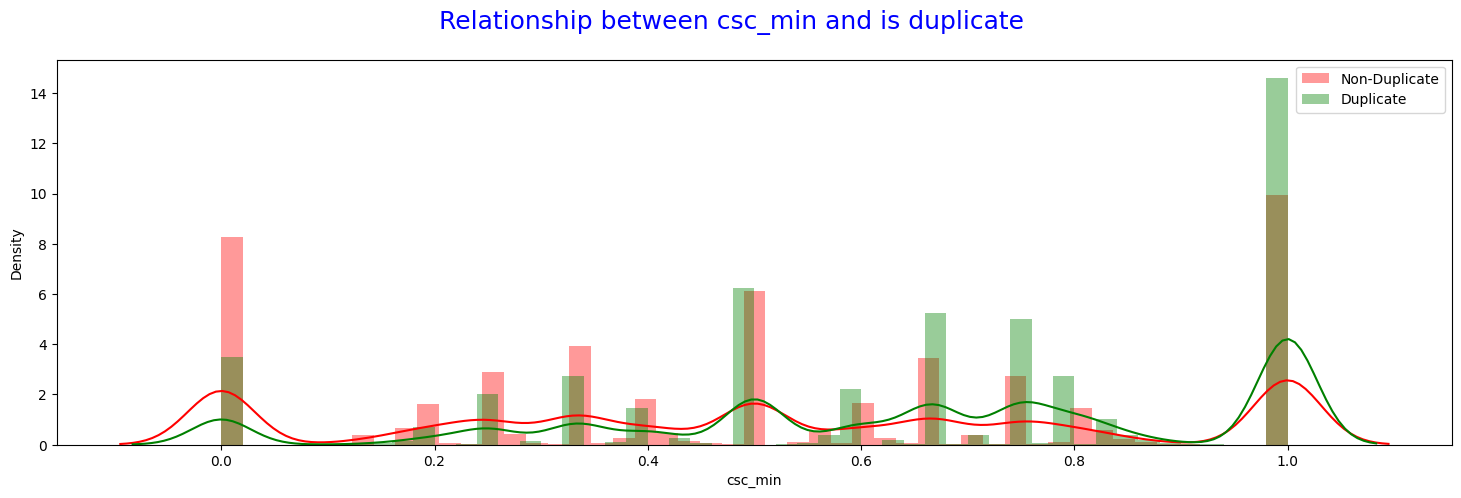

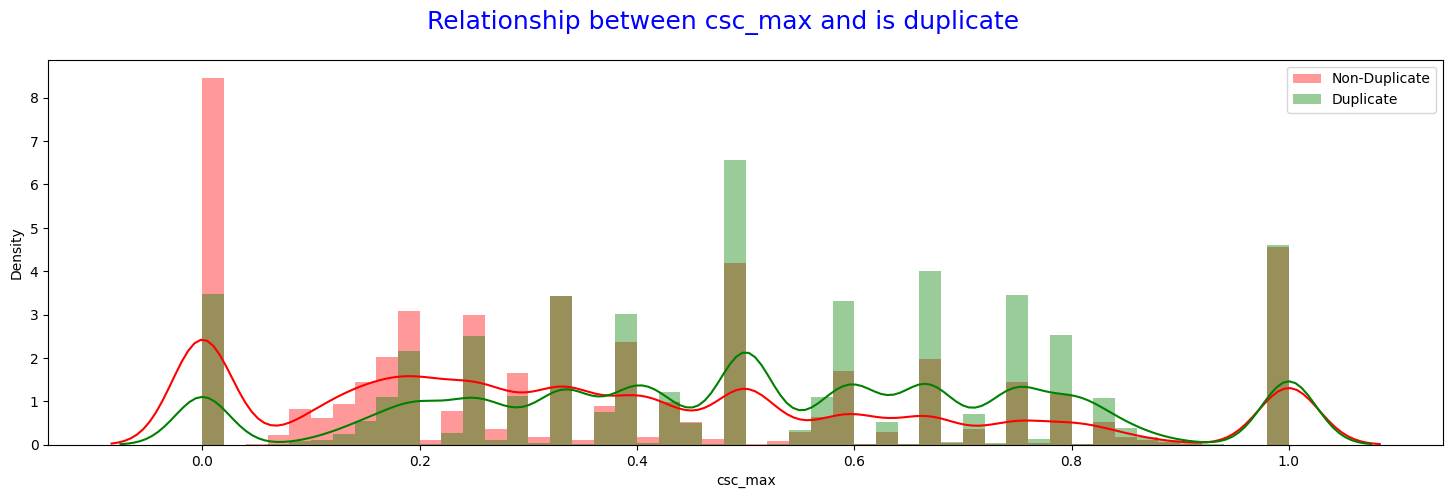

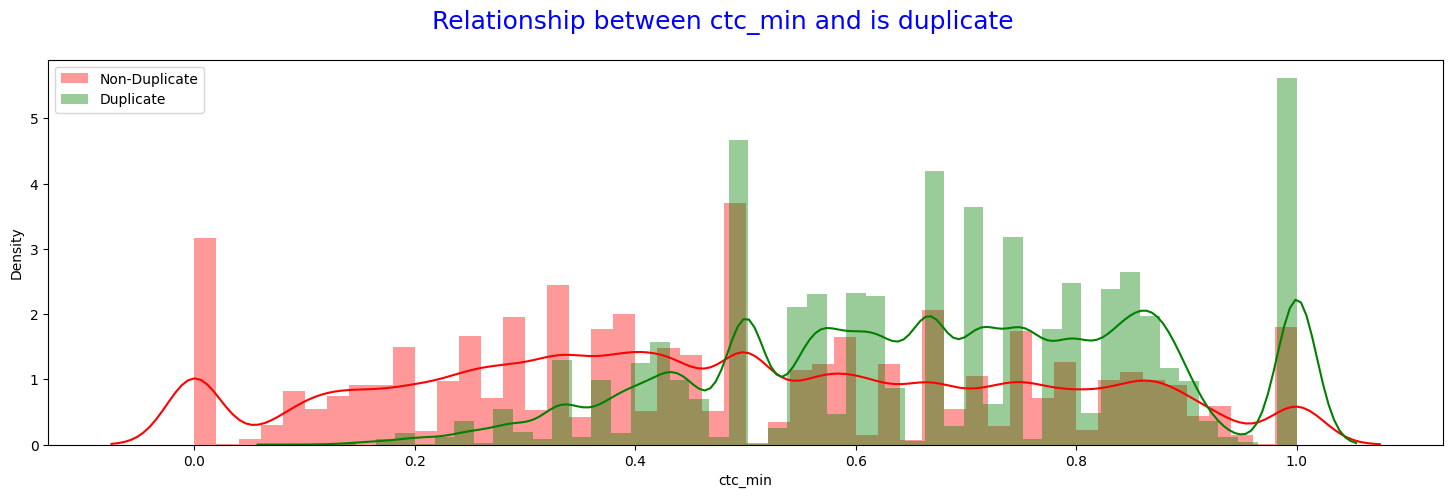

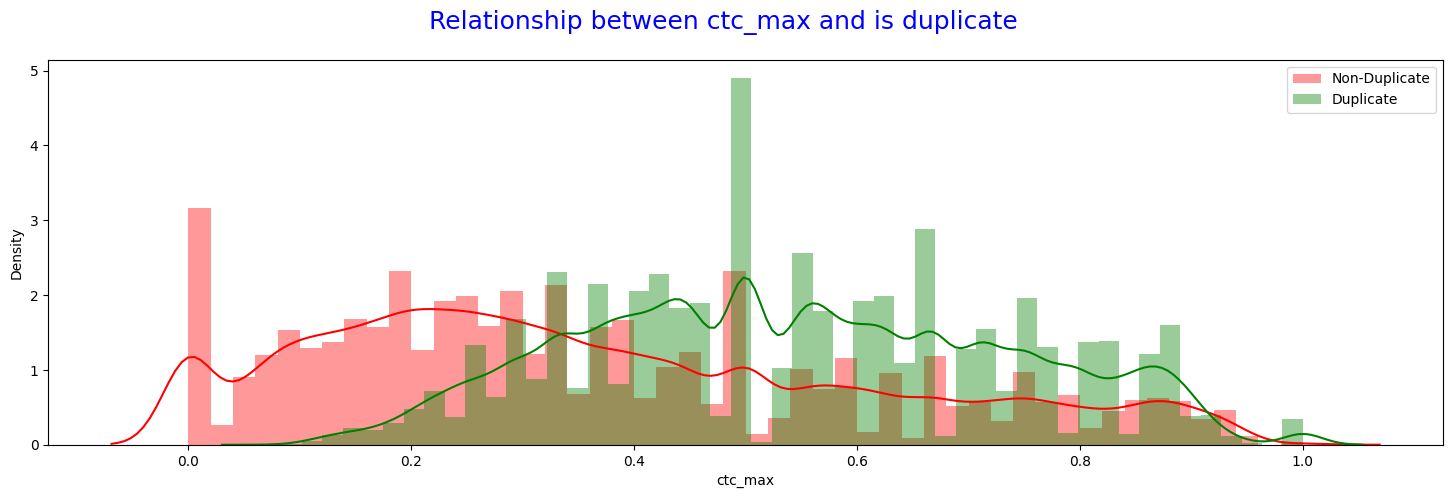

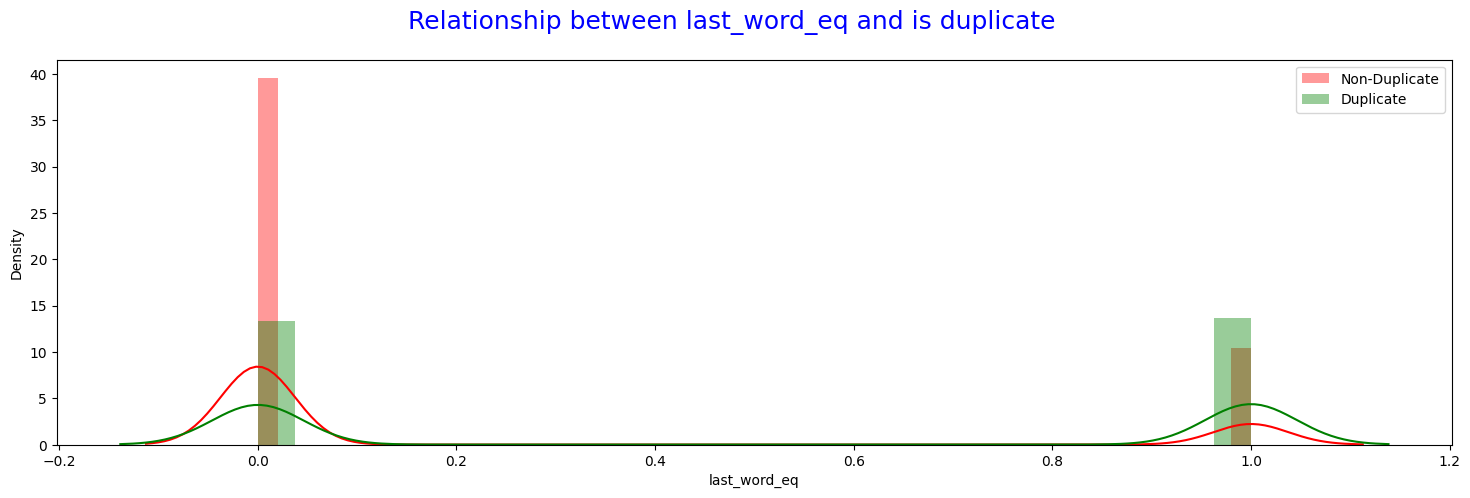

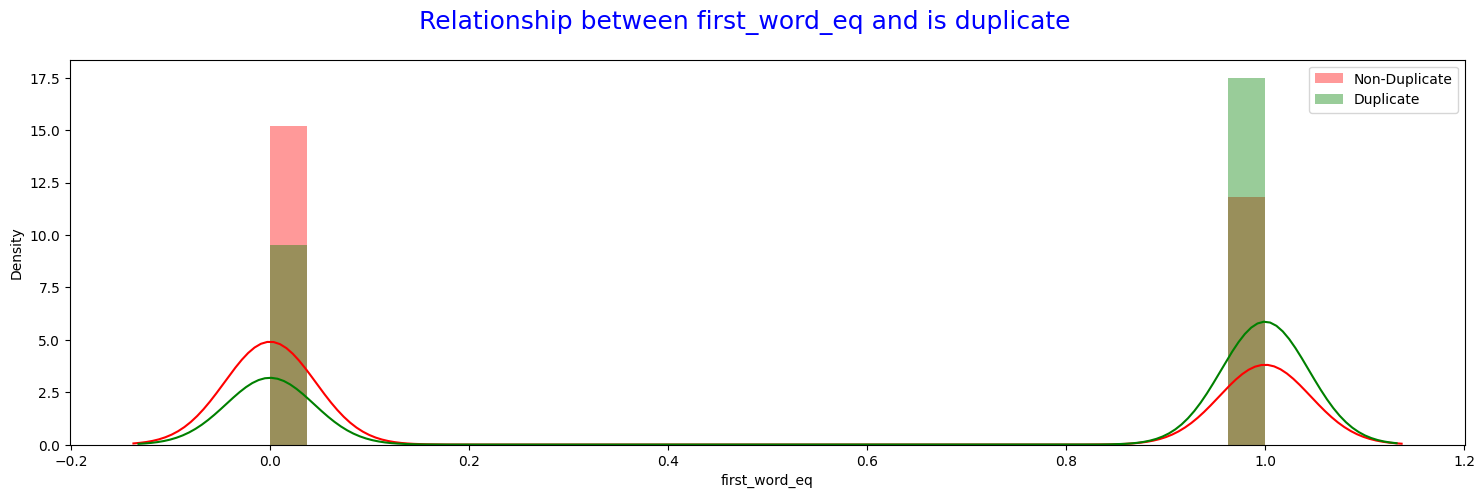

In [ ]:
token_features_df=df_bal[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq']]
for col in token_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(df_bal[df_bal['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(df_bal[df_bal['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);


### 3. Length based extraction

In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import distance
def length_features_extraction(row):
    q1=row['cleanQ1_stem']
    q2=row['cleanQ2_stem']
    length_features=[0.0]*3

    q1_tokens=q1.split()   #stemmed question1 token
    q2_tokens=q2.split()   #stemmed question2 token
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    length_features[0]=abs(len(q1_tokens) - len(q2_tokens))            #absolute length
    length_features[1]=(len(q1_tokens) + len(q2_tokens))/2             #average token length
    strs=list(distance.lcsubstrings(q1, q2))                           #longest substring
    length_features[2]=len(strs) / (min(len(q1), len(q2)) + 1)         #longest substring ratio

    return length_features


In [ ]:
length_features=df_bal.progress_apply(length_features_extraction, axis=1)

df_bal['abs_len_diff']=list(map(lambda x: x[0], length_features))
df_bal['mean_len']=list(map(lambda x: x[1], length_features))
df_bal['long_substr_ratio']=list(map(lambda x: x[2], length_features))

df_bal.head(2)


100%|██████████| 298526/298526 [01:21<00:00, 3673.29it/s]


,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio
0,what are some examples of artificial satellites,what are artificial satellites,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,...,0.666644,0.999950,0.499988,0.999975,0.571420,1.0,1.0,1.0,2.5,0.050000
1,what does the term government mean,what does the term government 2 0 mean,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,...,0.599988,0.999967,0.999967,0.999983,0.749991,1.0,1.0,2.0,4.0,0.058824


# lets do some analysis on length features

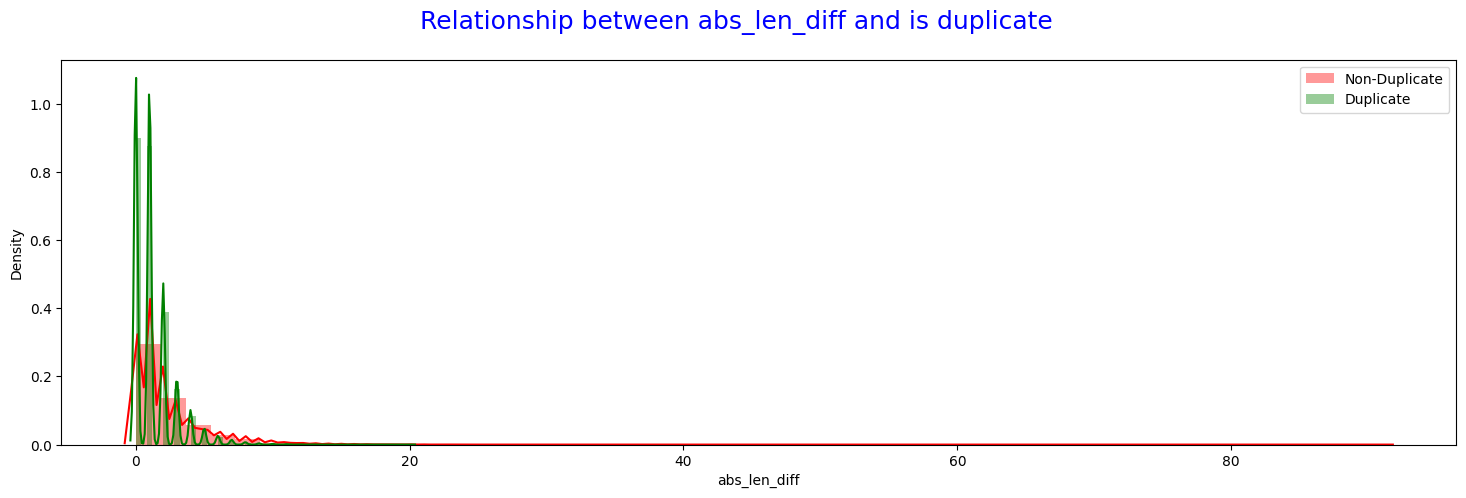

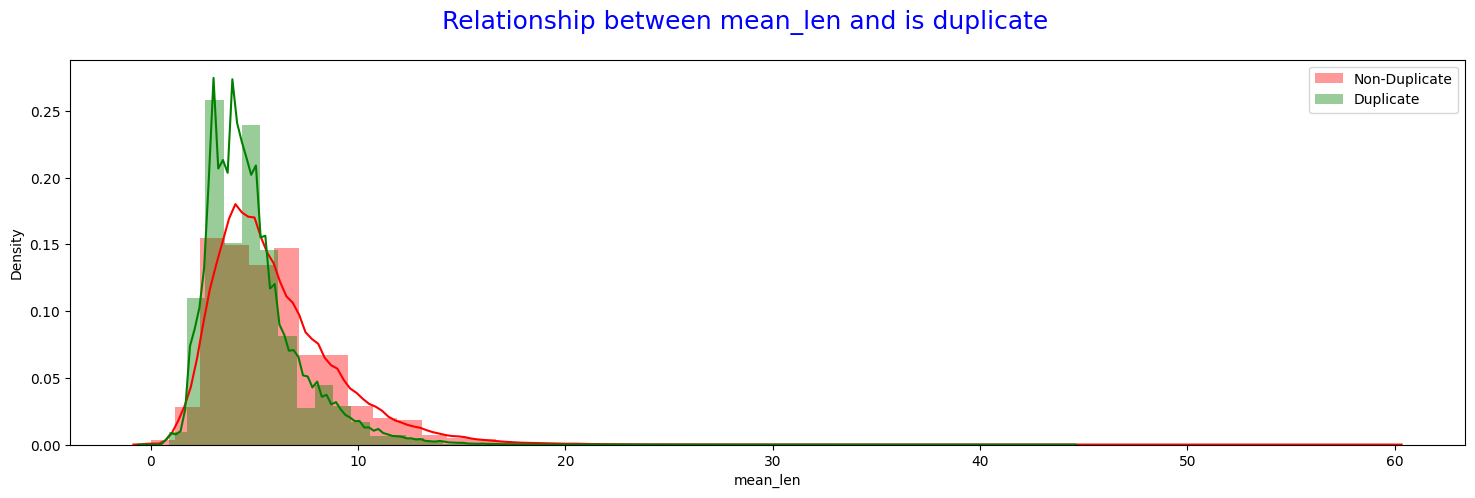

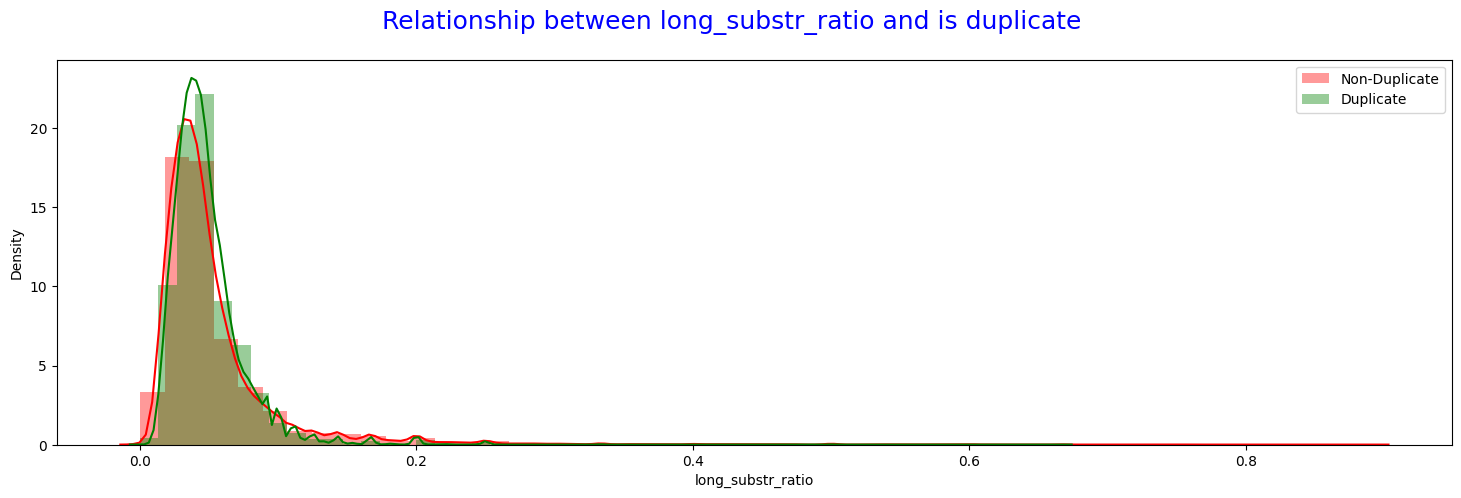

In [ ]:
length_features_df=df_bal[['abs_len_diff','mean_len','long_substr_ratio']]
for col in length_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(df_bal[df_bal['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(df_bal[df_bal['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);


### 4. Fuzzy Features extraction

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz
def fuzzy_features_extraction(row):
    q1=row['cleanQ1_stem']
    q2=row['cleanQ2_stem']
    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1, q2)              #fuzzy ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1, q2)       #fuzzy partial_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1, q2)    #token sort ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1, q2)     #token set ratio

    return fuzzy_features

In [ ]:
fuzzy_features=df_bal.progress_apply(fuzzy_features_extraction, axis=1)

df_bal['fuzz_ratio']=list(map(lambda x: x[0], fuzzy_features))
df_bal['fuzz_partial_ratio']=list(map(lambda x: x[1], fuzzy_features))
df_bal['token_sort_ratio']=list(map(lambda x: x[2], fuzzy_features))
df_bal['token_set_ratio']=list(map(lambda x: x[3], fuzzy_features))

df_bal.head(2)


100%|██████████| 298526/298526 [05:06<00:00, 973.79it/s] 


,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what are some examples of artificial satellites,what are artificial satellites,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,...,0.571420,1.0,1.0,1.0,2.5,0.050000,84,100,84,100
1,what does the term government mean,what does the term government 2 0 mean,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,...,0.749991,1.0,1.0,2.0,4.0,0.058824,89,75,89,100


# lets do some analysis on Fuzzy features

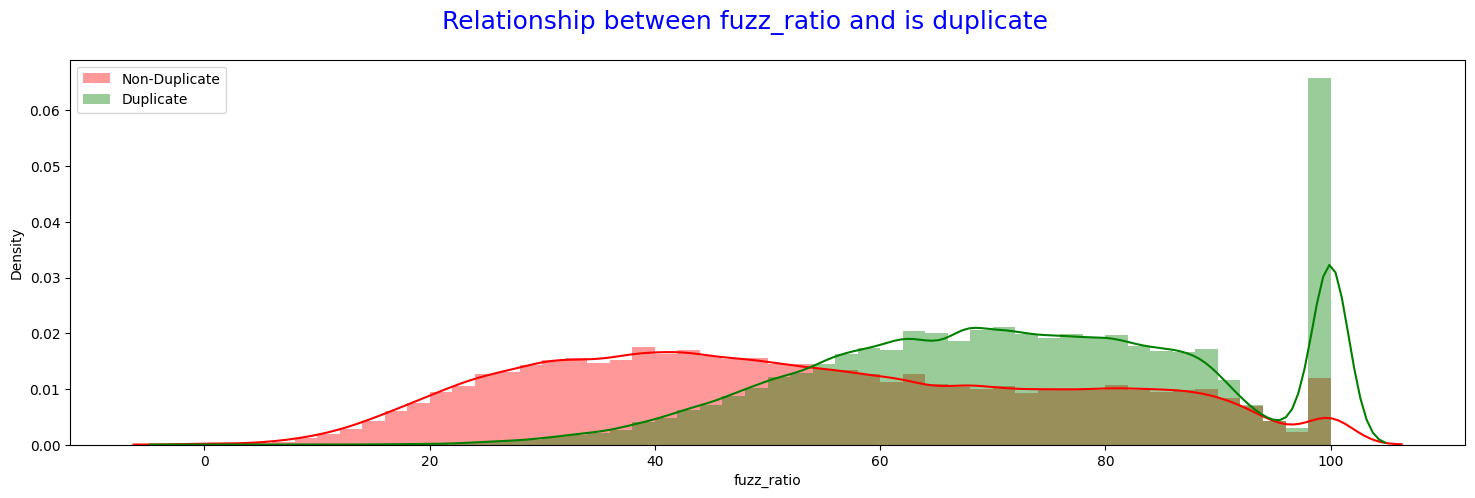

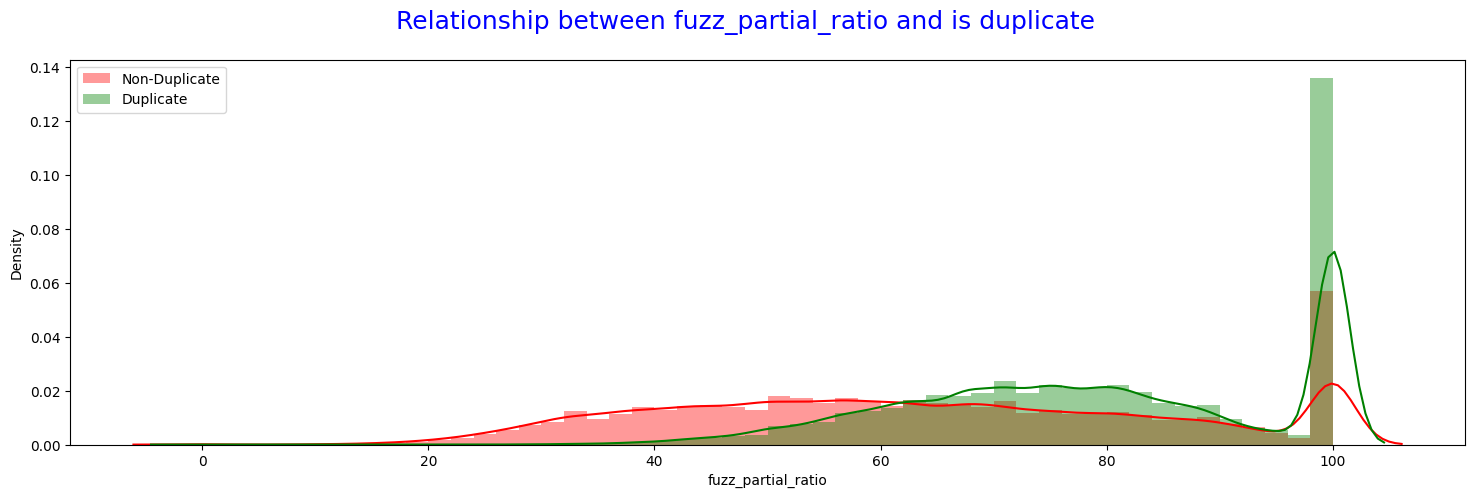

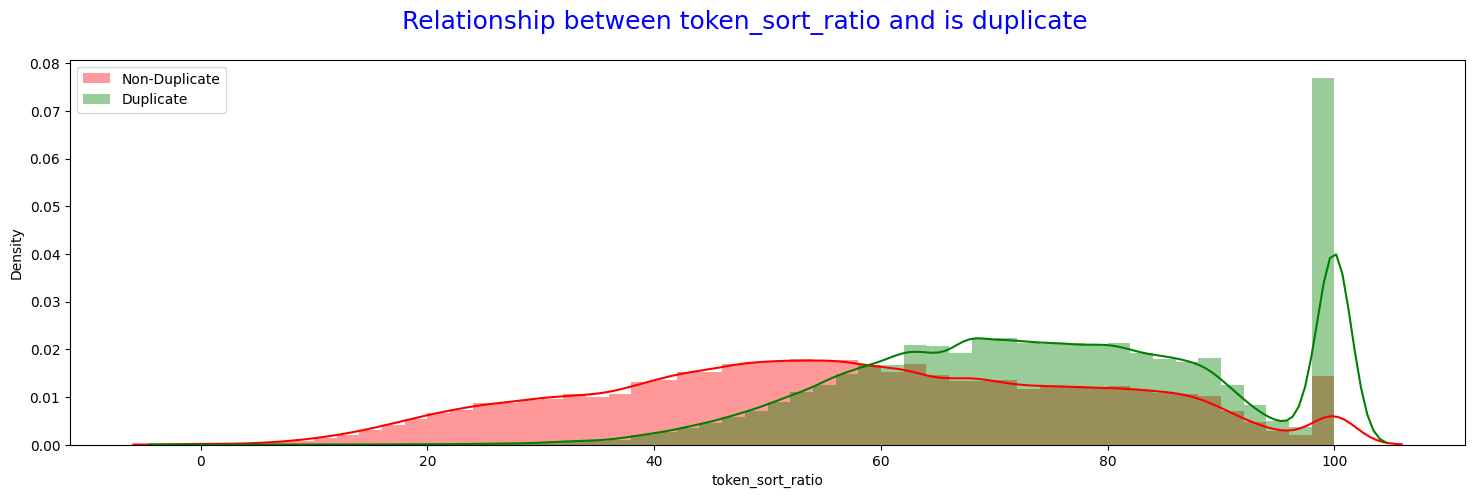

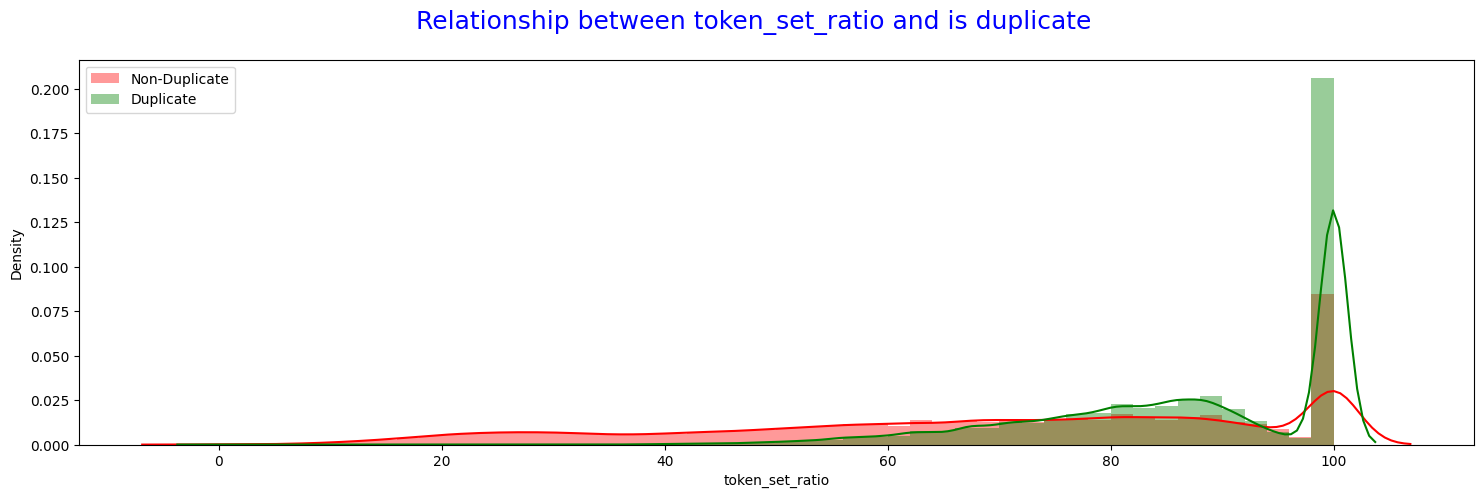

In [ ]:
fuzzy_features_df=df_bal[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']]
for col in fuzzy_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(df_bal[df_bal['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(df_bal[df_bal['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);


In [ ]:
df_bal.isna().sum()

question1              0
question2              0
is_duplicate           0
cleanQ1_stem           0
cleanQ2_stem           0
que1_len               0
que2_len               0
que1_num_words         0
que2_num_words         0
total_words            0
common_words           0
shared_words          13
cwc_min                0
cwc_max                0
csc_min                0
csc_max                0
ctc_min                0
ctc_max                0
last_word_eq           0
first_word_eq          0
abs_len_diff           0
mean_len               0
long_substr_ratio      0
fuzz_ratio             0
fuzz_partial_ratio     0
token_sort_ratio       0
token_set_ratio        0
dtype: int64

In [ ]:
df_bal.dropna(inplace = True)
df_bal.isna().sum()

question1             0
question2             0
is_duplicate          0
cleanQ1_stem          0
cleanQ2_stem          0
que1_len              0
que2_len              0
que1_num_words        0
que2_num_words        0
total_words           0
common_words          0
shared_words          0
cwc_min               0
cwc_max               0
csc_min               0
csc_max               0
ctc_min               0
ctc_max               0
last_word_eq          0
first_word_eq         0
abs_len_diff          0
mean_len              0
long_substr_ratio     0
fuzz_ratio            0
fuzz_partial_ratio    0
token_sort_ratio      0
token_set_ratio       0
dtype: int64

In [ ]:
df_bal.duplicated().sum()

670

In [ ]:
duplicate = df_bal[df_bal.duplicated()]
duplicate

,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
39641,what does the symbol mean,what does this symbol mean,0,symbol mean,symbol mean,11,11,2,2,4,...,0.799984,1.0,1.0,0.0,2.0,0.083333,100,100,100,100
48940,what is meaning of บ วงว มาลา,what does mean,0,mean บ วงว มาลา,mean,15,4,4,1,5,...,0.142855,0.0,1.0,3.0,2.5,0.200000,42,100,42,100
57516,what does this symbol mean,what does this symbol mean,0,symbol mean,symbol mean,11,11,2,2,4,...,0.999980,1.0,1.0,0.0,2.0,0.083333,100,100,100,100
61801,what does the symbol mean,what does this symbol mean,0,symbol mean,symbol mean,11,11,2,2,4,...,0.799984,1.0,1.0,0.0,2.0,0.083333,100,100,100,100
65403,what is the limit of x 2 x x x as x approaches 1,what is the limit of 1 as 2 approaches 3,0,limit x 2 x x x x approach 1,limit 1 2 approach 3,28,20,9,5,10,...,0.642853,0.0,1.0,4.0,7.0,0.047619,75,60,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298113,how do i lose weight,how do i reduce body weight,1,lose weight,reduc bodi weight,11,17,2,3,5,...,0.666656,1.0,1.0,1.0,2.5,0.083333,57,73,64,71
298304,what are the best places to visit on a 3 day trip in and around kerala,what all places can one visit on a two day trip in kerala india,1,best place visit 3 day trip around kerala,place one visit two day trip kerala india,41,41,8,8,16,...,0.562496,0.0,1.0,0.0,8.0,0.023810,68,68,66,80
298345,what are the best places to visit in kanhangad kerala,what are the best places to visit on a 3 day trip in and around kerala,1,best place visit kanhangad kerala,best place visit 3 day trip around kerala,33,41,5,8,13,...,0.562496,1.0,1.0,3.0,6.5,0.029412,73,58,68,82
298389,daniel ek when is spotify coming to india,when will spotify launch in india,1,daniel ek spotifi come india,spotifi launch india,28,20,5,3,8,...,0.374995,1.0,0.0,2.0,4.0,0.047619,62,79,54,79


In [ ]:
df_bal.drop_duplicates(inplace = True)
df_bal.duplicated().sum()


0

# To reduce size we can drop unwanted columns

In [ ]:
df_bal.head(3)

,question1,question2,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what are some examples of artificial satellites,what are artificial satellites,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,...,0.571420,1.0,1.0,1.0,2.5,0.050000,84,100,84,100
1,what does the term government mean,what does the term government 2 0 mean,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,...,0.749991,1.0,1.0,2.0,4.0,0.058824,89,75,89,100
2,is the usda constitutional,what is a usda loan,0,usda constitutional,usda loan,19,9,2,2,4,...,0.399992,0.0,0.0,0.0,2.0,0.100000,50,78,50,62


In [ ]:
df_bal.drop(columns=['question1','question2'],inplace = True)
df_bal.head(3)

,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,2,0.40,...,0.571420,1.0,1.0,1.0,2.5,0.050000,84,100,84,100
1,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,1,0.12,...,0.749991,1.0,1.0,2.0,4.0,0.058824,89,75,89,100
2,0,usda constitutional,usda loan,19,9,2,2,4,2,0.50,...,0.399992,0.0,0.0,0.0,2.0,0.100000,50,78,50,62


In [ ]:
df_bal.isna().sum()

is_duplicate          0
cleanQ1_stem          0
cleanQ2_stem          0
que1_len              0
que2_len              0
que1_num_words        0
que2_num_words        0
total_words           0
common_words          0
shared_words          0
cwc_min               0
cwc_max               0
csc_min               0
csc_max               0
ctc_min               0
ctc_max               0
last_word_eq          0
first_word_eq         0
abs_len_diff          0
mean_len              0
long_substr_ratio     0
fuzz_ratio            0
fuzz_partial_ratio    0
token_sort_ratio      0
token_set_ratio       0
dtype: int64

# Now save this dataset for further process

In [ ]:
df_bal.to_csv("/content/drive/MyDrive/quora/data/processed_datase.csv", index=False)
